In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt 

In [2]:
data = pd.read_csv('Exp2_Dataset.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head(10)

0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1
5  45.083277  56.316372  0
6  61.106665  96.511426  1
7  75.024746  46.554014  1
8  76.098787  87.420570  1
9  84.432820  43.533393  1

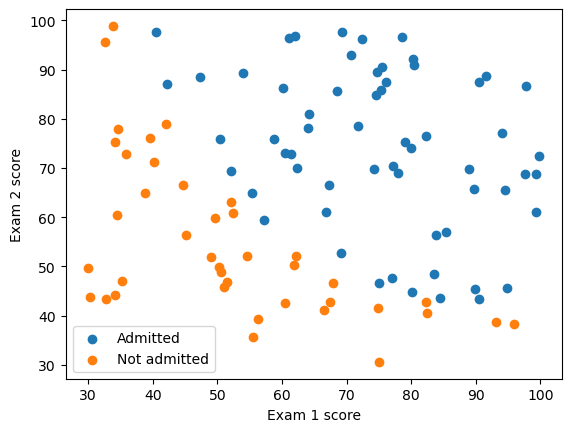

In [3]:
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [4]:
def sigmoid(x):
      return 1/(1+np.exp(-x))

In [5]:
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

In [6]:
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [7]:
(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n+1,1)) # intializing theta with all zeros
J = costFunction(theta, X, y)
print(J)

0.6931471805599453


C:\Users\chey\AppData\Local\Temp\ipykernel_23360\2622592648.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [8]:
temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))
theta_optimized = temp[0]
print(theta_optimized)

[-25.16131857   0.20623159   0.20147149]


In [9]:
J = costFunction(theta_optimized[:,np.newaxis], X, y)
print(J)

0.20349770158947478


In [10]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]

In [11]:
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x)) 

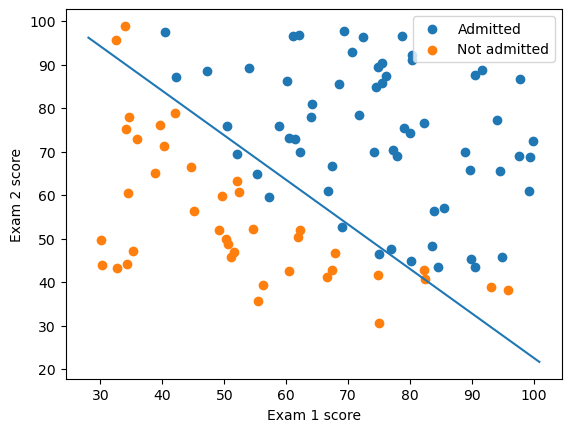

In [12]:
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [13]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print("The accuracy of the work is",acc * 100)
accuracy(X, y.flatten(), theta_optimized, 0.5)

The accuracy of the work is 89.0
